In [6]:
import sys 
sys.path.append('/home/kelcey/hera/Washington/uwchamp2017/fits_functions')
sys.path.append('/home/kelcey/hera/Washington/uwchamp2017')

#import importlib.util
#spec = importlib.util.spec_from_file_location("spec_calcs", "/home/kelcey/hera/Washington/uwchamp2017/clusterer.py")

#spec_calcs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(spec_calcs)

import clusterer as clst
import fits_functions as ff

/home/kelcey/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [75]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from astropy import units as u
import glob
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from pylab import *
from astropy.table import Table
from astropy.coordinates import match_coordinates_sky

This is a quick walkthrough of how to view the contours of an extended object (EO) from FHD data
on top of images of the same object from TGSS or NVSS. We start with an IDL .sav
file like this: 

'new_source_arrays/1130788624_source_array.sav'

This can be opened using clst.collector; see its documentation for information about this function.

In [8]:
data = clst.collector('/home/kelcey/hera/Washington/uwchamp2017/1130773144_source_array.sav')

# downloadTGSS

From here, data can be put into these functions to be plotted. We still need the
images from TGSS or NVSS to compare it with. To do this, we plug data and the
object ID into the function downloadTGSS. We will use EO ID 32770 for this example.

In [9]:
data

{'data': [{'source_array': rec.array([(32769, 1230.3986 , 1071.8334 , 50.40629 , -37.14988 , 1.0313290e+04, 182.43523, -0.79999924, 1., 0, rec.array([(32769, 1229.1859, 1071.7485, 50.32079 , -37.162556, 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.23282537, 0.25499895, 0.00647642+0.j, 0.00647678+0.j, 1.4703797, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.1833, 1071.7672, 50.320404, -37.16155 , 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.21357521, 0.2339155, 0.00594095+0.j, 0.00594128+0.j, 1.3488078, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.8564, 1070.7148, 50.37978 , -37.21474 , 0., 182.43

In [10]:
fitsTGSS = ff.downloadTGSS(data,32770)

print fitsTGSS

EOID32770_RA50.9784660339_DEC-37.2810325623_TGSS.fits


# contourFits

We are now ready to plot the ocntours of our EO on top of the TGSS
image of it! All you need to do is run contourFits, like this:

/home/kelcey/anaconda3/envs/py27/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmax to  1.010e-01 [aplpy.core]
32770_contours_TGSS.png


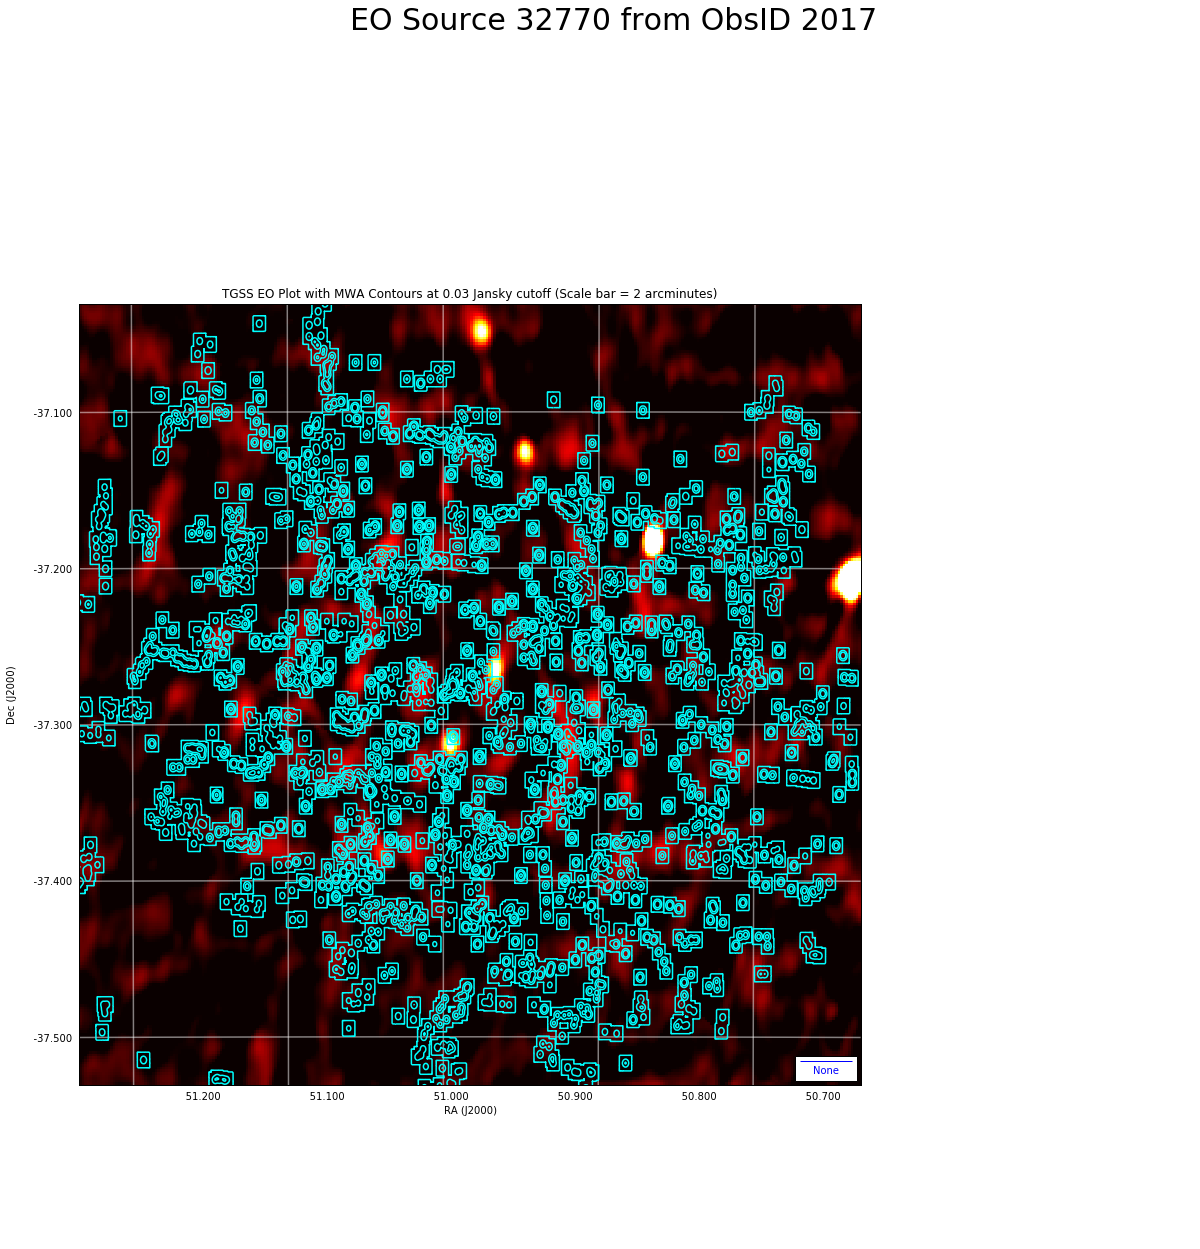

In [11]:
contourFileTGSS = ff.contourFits(data,fitsTGSS,32770,'32770_contours_TGSS.png')

print contourFileTGSS

Congratulations! You now have a .png file of this image. 

Now, lets check this object against NVSS. To do this, simply run downloadTGSS
as you did before, but include the argument NVSS=True, to get the FITS image 
file. From there, run contourFile with this FITS file.



EOID32770_RA50.9784660339_DEC-37.2810325623_NVSS.fits
INFO: Auto-setting vmax to  2.379e-02 [aplpy.core]



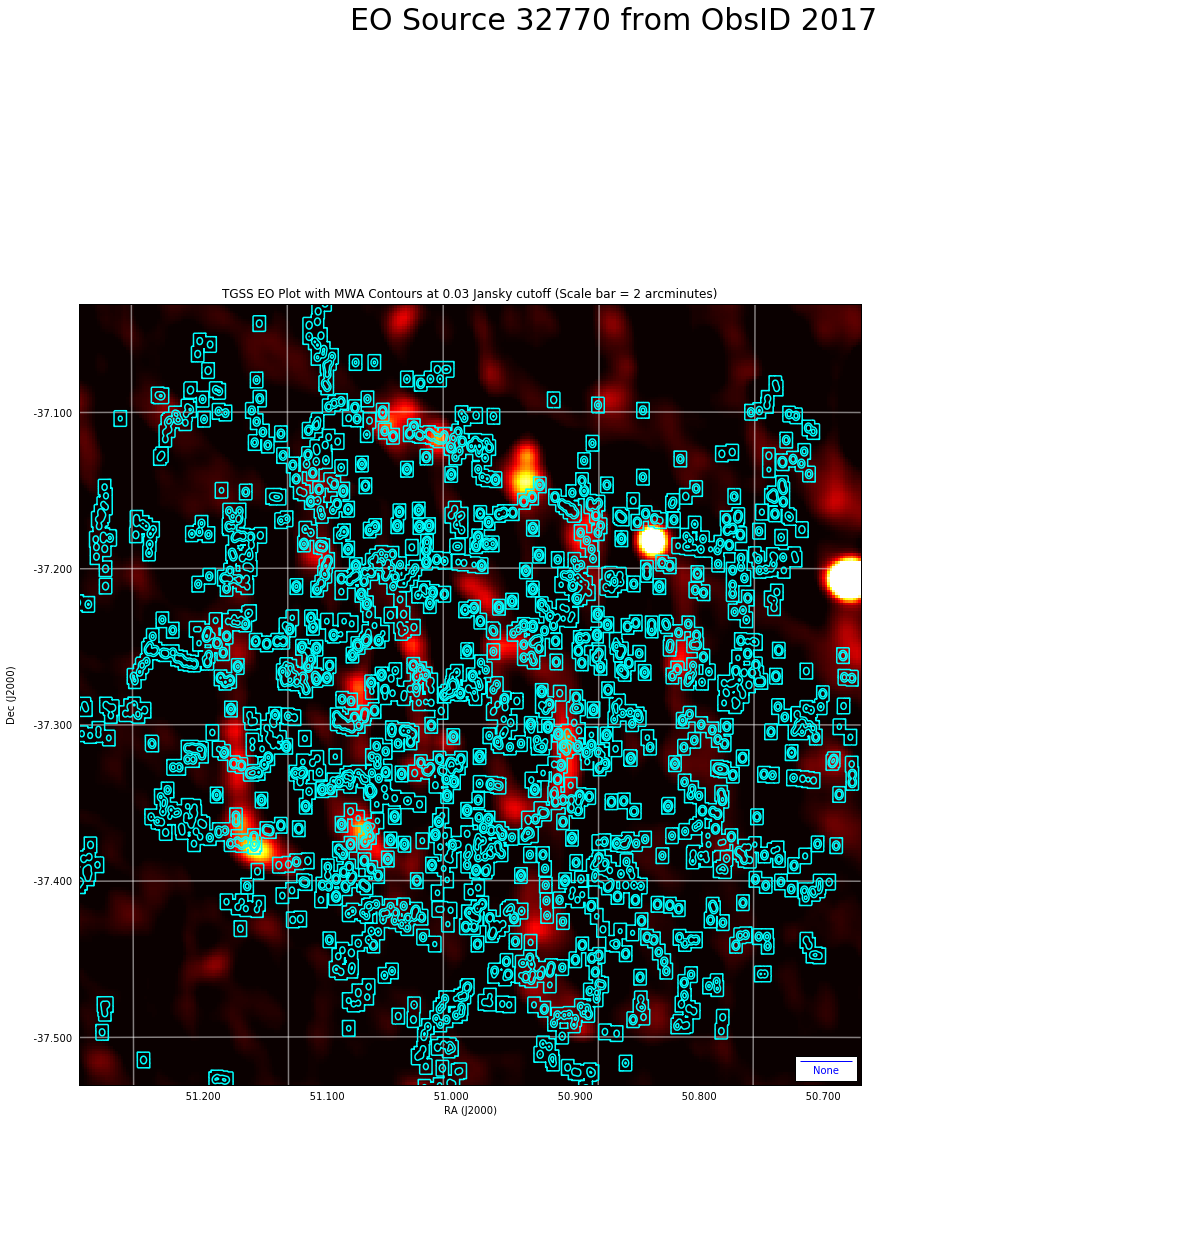

In [12]:
fitsNVSS = ff.downloadTGSS(data,32770,NVSS=True,)
print fitsNVSS

contourFileNVSS = ff.contourFits(data,fitsNVSS,32770,'32770_contours_NVSS.png')
print 

If you want to see the plots when clustering has been applied to the file,
then include the argument cluster=True. The default flux cutoff for this is 
0.03 janskies, but if you would like to change this value (to 0.02 janskies,
for example), then include the argument cutoff=0.02.

In [16]:
contourFileTGSScutoff = ff.contourFits(data,fitsTGSS,32770,
                                       '32770_contours_TGSS_cutoff.png',cluster=True,cutoff=0.02)

AttributeError: 'module' object has no attribute 'modeler'

# getFits

Last function! If you want to make a binary FITS file out of data that has had some clustering
done to it, use getFits. First, make a list of all of the EOids of the EO's that you would like 
clustered:

In [13]:
EOlist = [32770,32772,32808]

Now plug this in to the argument EOidList

In [18]:
someCutsFits = ff.getFits(data,EOidList=EOlist,filename='practice.FITS')

AttributeError: 'module' object has no attribute 'modeler'

# Start of Kelcey's Work

INFO: Auto-setting vmax to  1.010e-01 [aplpy.core]


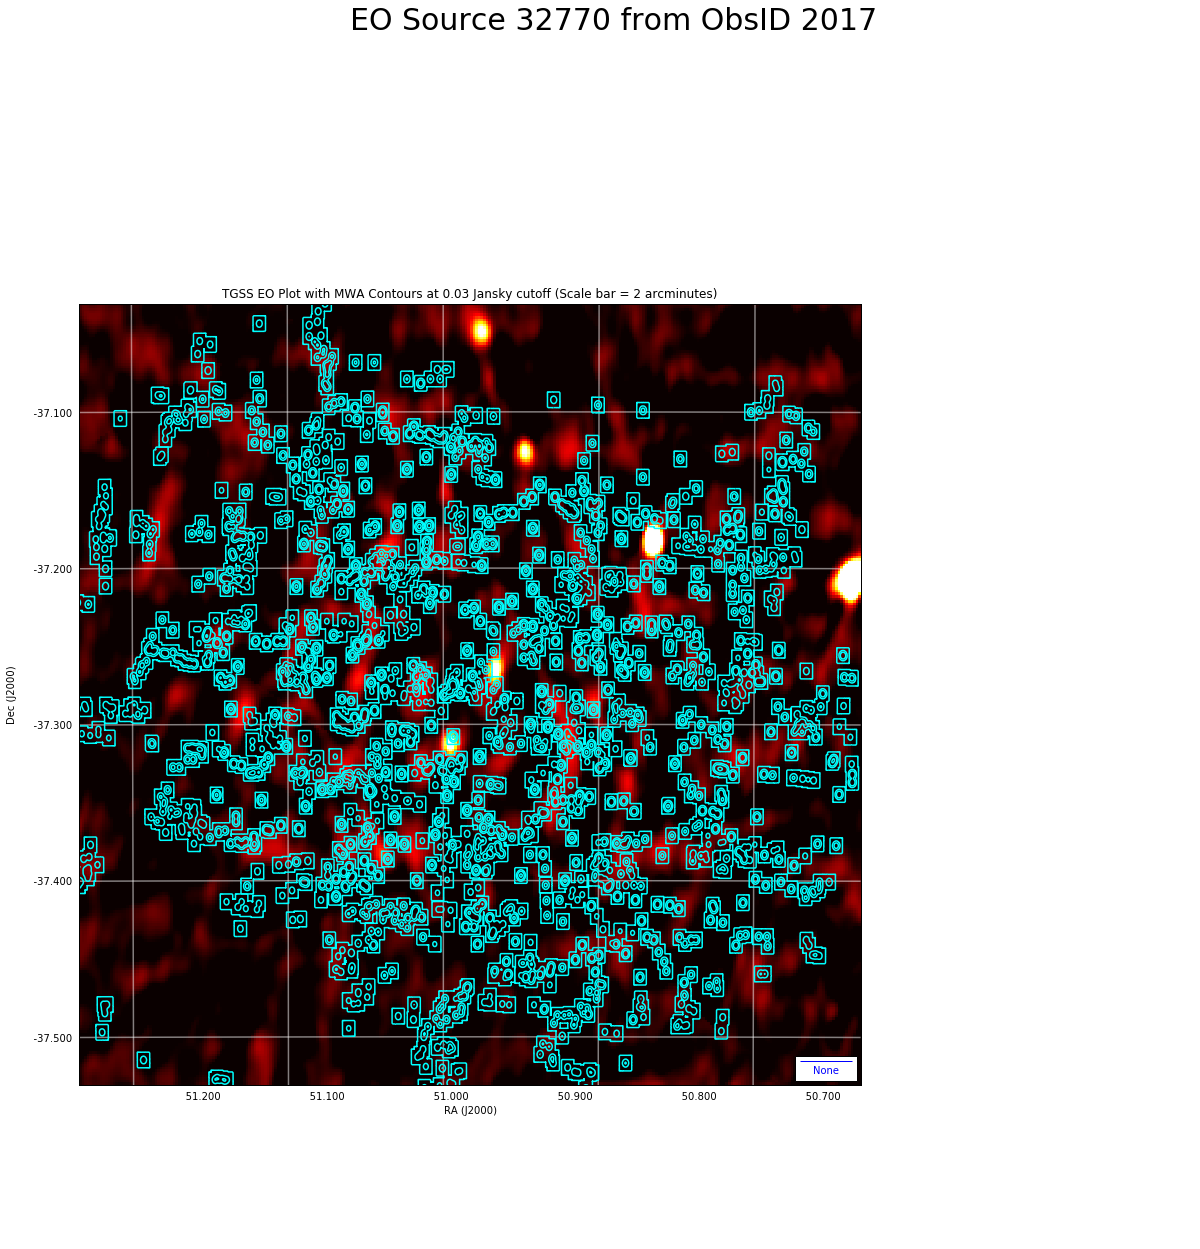

In [14]:
contourFileTGSScutoff = ff.contourFits(data,fitsTGSS,32770,
                                       '32770_contours_TGSS_cutoff.png',cluster=False,cutoff=0.02)
#This code would not run because it called a function 'modeler' that does not exist. Setting cluster to False 
#is the only way to get ff.contourFits to run.

In [20]:
someCutsFits = ff.getFits(data,EOidList=EOlist,filename='practice.FITS')
#Since clst.modler is necessary for this function to run, it will not run unless we find out where
#to find clst.modler

AttributeError: 'module' object has no attribute 'modeler'

In [15]:
path = '/home/kelcey/hera/Washington/uwchamp2017/1130773144_source_array.sav'
sep = clst.separator(data)
#This function seperates the data into point sources and extended sources

In [16]:
points = sep['psources']
exts = sep['extsources']
#Defining two lists for the point sources and extended sources

In [23]:
points_seek = clst.seeker(points)
#Can't use this function on data that has already been separated

TypeError: list indices must be integers, not str

In [17]:
data_seek = clst.seeker(data)

In [18]:
data_seek.keys()

['point_sources_DEC',
 'all_YY',
 'point_sources_YX',
 'EO_sources_Q',
 'point_sources_ID',
 'EO_sources_I',
 'point_sources_STON',
 'all_DEC',
 'EO_sources_DEC',
 'EO_sources_FREQ',
 'EO_sources_YX',
 'EO_sources_YY',
 'all_BEAM',
 'all_I',
 'point_sources_RA',
 'all_XX',
 'EO_sources_ALPHA',
 'point_sources_V',
 'point_sources_U',
 'EO_sources_FLAG',
 'EO_sources_XX',
 'EO_sources_X',
 'point_sources_Q',
 'point_sources_ALPHA',
 'point_sources_XX',
 'point_sources_XY',
 'point_sources_YY',
 'point_sources_GAIN',
 'EO_sources_RA',
 'point_sources_Y',
 'point_sources_X',
 'EO_sources_V',
 'point_sources_FREQ',
 'all_RA',
 'EO_sources_Y',
 'EO_sources_ID',
 'EO_sources_GAIN',
 'EO_sources_U',
 'point_sources_FLAG',
 'EO_sources_XY',
 'point_sources_I',
 'EO_sources_STON']

In [19]:
brights = clst.chaser(data_seek['EO_sources_ID'], data_seek['EO_sources_X'], data_seek['EO_sources_Y'],
           data_seek['EO_sources_RA'], data_seek['EO_sources_DEC'], data_seek['EO_sources_STON'], 
           data_seek['EO_sources_FREQ'], data_seek['EO_sources_ALPHA'], data_seek['EO_sources_GAIN'],
           data_seek['EO_sources_FLAG'], data_seek['EO_sources_XX'], data_seek['EO_sources_YY'],
           data_seek['EO_sources_XY'], data_seek['EO_sources_YX'], data_seek['EO_sources_I'],
           data_seek['EO_sources_Q'], data_seek['EO_sources_U'], data_seek['EO_sources_V'], 
                      radius = 1)

In [20]:
brights

{'brightest_ALPHA': [-0.8],
 'brightest_DEC': [-37.162556],
 'brightest_FLAG': [0],
 'brightest_FREQ': [182.43501],
 'brightest_GAIN': [0.1],
 'brightest_I': [1.4703797],
 'brightest_ID': [32769],
 'brightest_Q': [0.0],
 'brightest_RA': [50.32079],
 'brightest_STON': [0.0],
 'brightest_U': [0.0],
 'brightest_V': [0.0],
 'brightest_X': [1229.1859],
 'brightest_XX': [0.23282537],
 'brightest_XY': [(0.006476422+0j)],
 'brightest_Y': [1071.7485],
 'brightest_YX': [(0.0064767767+0j)],
 'brightest_YY': [0.25499895],
 'brightest_indices': [0]}

In [21]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}

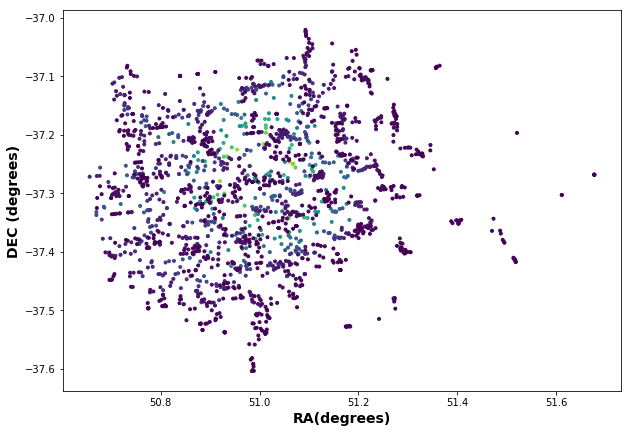

In [22]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
ID = np.array(data_seek['point_sources_ID'])
plt.scatter(RA[:, 1][0], DEC[:, 1][0], c = I[:, 1][0], marker = '.' )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)');

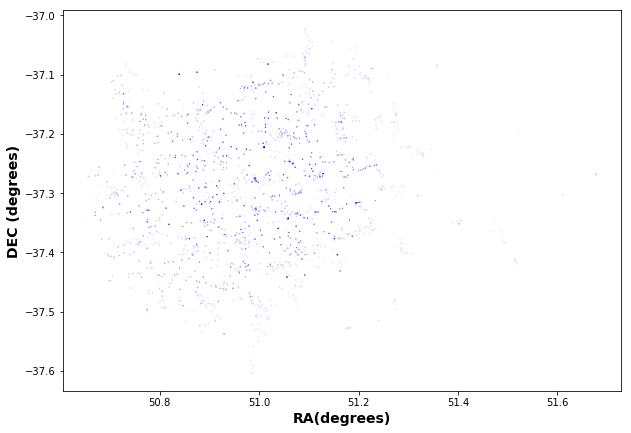

In [23]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
plt.scatter(RA[:, 1][0], DEC[:, 1][0], s = I[:, 1][0], marker = '.', color = 'b' )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)');

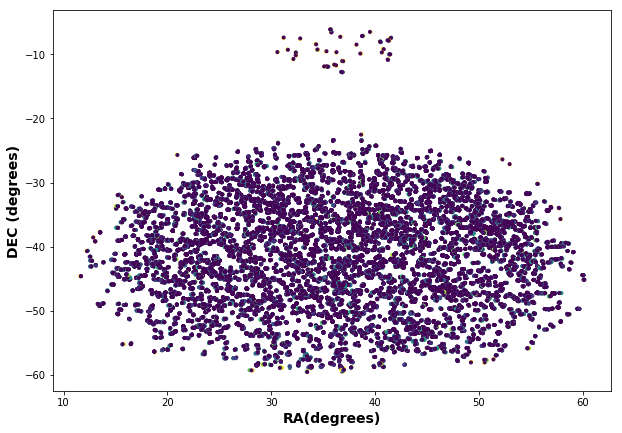

In [24]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])

for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], c = I[:, i][0], marker = '.')
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

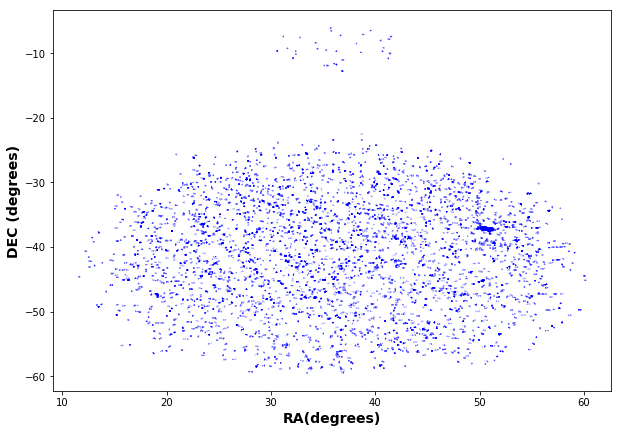

In [25]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])

for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = 'b' )
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

In [58]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])

colors = ['r', 'y', 'm', 'g', 'c', 'b', 'orange', 'maroon', 'limegreen', 
          'saddlebrown', 'darkseagreen', 'olive']
c_rand = np.random.choice(colors, RA.shape[1])

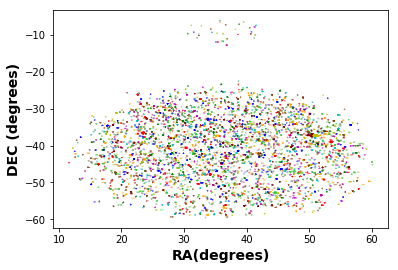

In [59]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

#### Explanation of the Above Plot:

Since each of the sources are made up of many point sources, the sourcecs are assigned a random color and plotted together. The size of the dots correlate to their brightness. The brightest source is shown in the below plot.

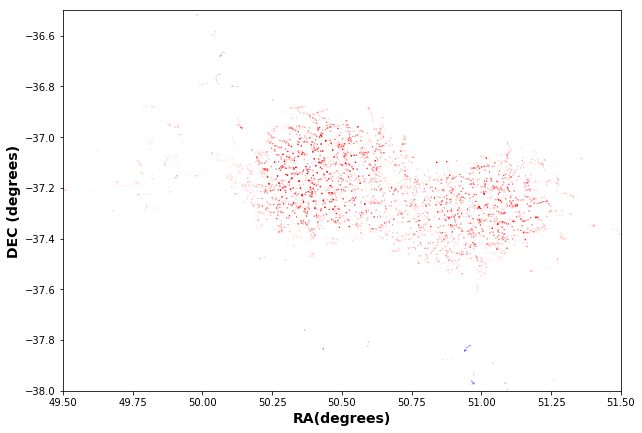

In [28]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(49.5, 51.5)
plt.ylim(-38, -36.5);

In [67]:
def create_radio_sky(directory):
    """

    Creates a graph of the radio sky for each given file in a directory

    """
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.rc('axes', labelsize=14)
    plt.rc('axes', labelweight='bold')
    plt.rc('axes', titlesize=16)
    plt.rc('axes', titleweight='bold')
    plt.rc('font', family='sans-serif')

    paths = glob.glob(directory + '*.sav')
    n = 0
    for path in paths[0:4]:
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        RA = np.array(data_seek['EO_sources_RA'])
        DEC = np.array(data_seek['EO_sources_DEC'])
        I = np.array(data_seek['EO_sources_I'])

        colors = ['r', 'y', 'm', 'g', 'c', 'b', 'orange', 'maroon', 'limegreen', 
                  'saddlebrown', 'darkseagreen', 'darkviolet', 'indigo']
        c_rand = np.random.choice(colors, RA.shape[1])
        plt.figure()
        #n = n+1
        #plt.subplot(100 + n)
        for i in range (0, RA.shape[1]):
            plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
            plt.xlabel('RA(degrees)')
            plt.ylabel('DEC (degrees)');
    return

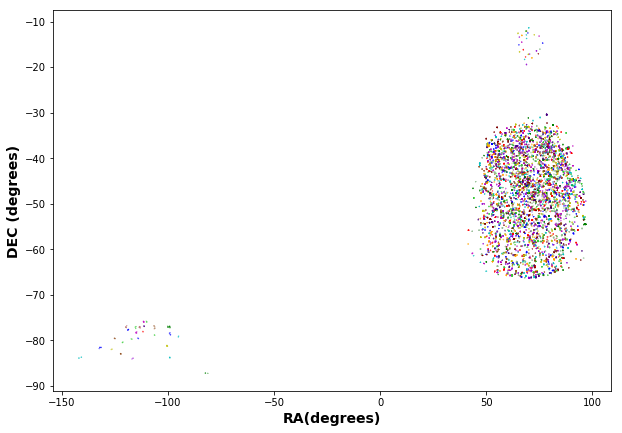

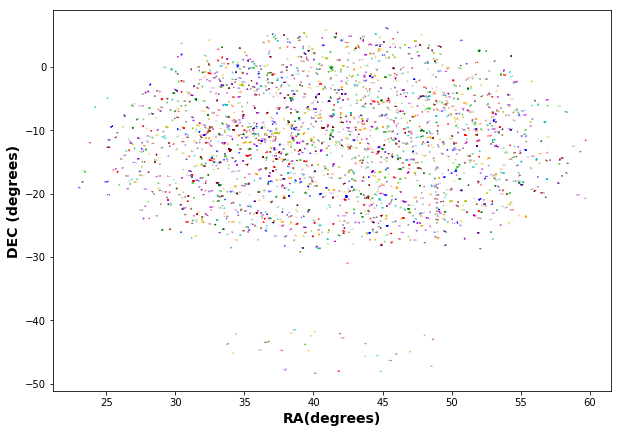

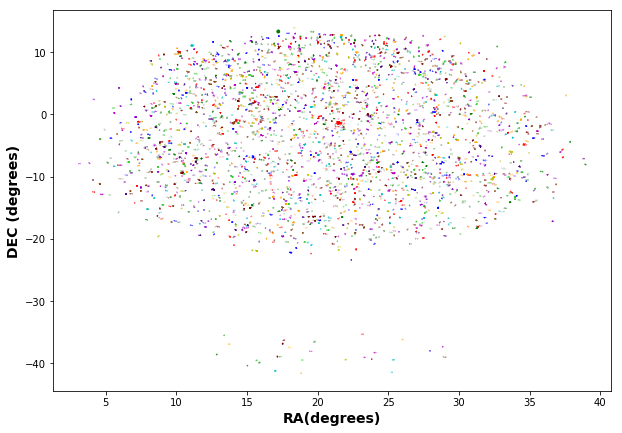

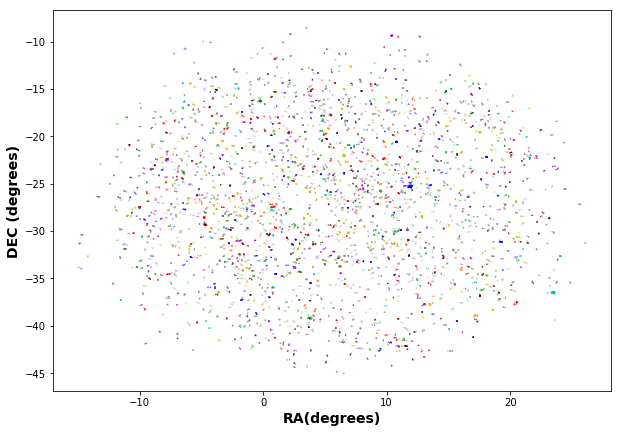

In [68]:
directory = '/home/kelcey/hera/Washington/uwashchamp2019/source_array_data/'

create_radio_sky(directory)

In [104]:
def table_match(directory, index):
    """
    Matches every image in a given directory and returns a Data Frame with the Ra, Dec, and 
    Magnitudes of each object in the images
    
    Directory is an absolute path to a directory containing the images
    
    index is the index of the image the rest of the images will be compared to
    
    """
    
    i = 0
    
    paths = glob.glob(directory + '*.sav')
    data0 = clst.collector(paths[index])
    data_seek0 = clst.seeker(data0)
    
    ra0 = np.array(data_seek0['EO_sources_RA'])[:][0]
    
    dec0 = np.array(data_seek0['EO_sources_DEC'])[:][0]
    
    mag0 = np.array(data_seek0['EO_sources_I'])[:][0]
    
    n=0
    df0 = pd.DataFrame({'RA': ra0[i],'Mag {}'.format(n): mag0[i],  'DEC' : dec0[i]})
    
    for path in paths[0:3]:
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        n = n + 1
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        ra = np.array(data_seek0['EO_sources_RA'])[:][0]
      
        dec = np.array(data_seek0['EO_sources_DEC'])[:][0]
       
        mag = np.array(data_seek0['EO_sources_I'])[:][0]


        catalog = SkyCoord(ra=ra[i]*u.deg, dec=dec[i]*u.deg)  
        c = SkyCoord(ra=ra0[i]*u.deg, dec=dec0[i]*u.deg)  
        idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

        s_n = pd.Series(mag[i][idx])
        df0['Mag {}'.format(n)] = s_n
        
    return df0

In [105]:
table = table_match(directory, 0)
table

TypeError: only integer scalar arrays can be converted to a scalar index

In [100]:
RA = np.array(data_seek['EO_sources_RA'])[:][0]
DEC = np.array(data_seek['EO_sources_DEC'])[:][0]
ras = [i * u.deg for i in RA]
decs = [i * u.deg for i in DEC]
SkyCoord(RA[0]*u.deg, DEC[0]*u.deg)

<SkyCoord (ICRS): (ra, dec) in deg
    [(50.32079 , -37.162556), (50.320404, -37.16155 ),
     (50.37978 , -37.21474 ), ..., (50.30701 , -37.34507 ),
     (49.82373 , -37.149242), (49.812176, -37.021797)]>